# Practical Lab 1 – Univariate Linear Regression on California Housing Prices

## Introduction

In this lab, we explore the relationship between California housing prices and other factors such as median income, population, and number of households. We use **univariate linear regression** to predict house prices using one feature at a time.

This notebook is intended for non-technical stakeholders (like Product Managers) and aims to clearly explain each modeling step, results, and insights using clean graphs and plain language.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Show plots in notebook
%matplotlib inline


## Load the Data

We use a public California housing dataset for ML training.


Dataset Source: [California Housing Dataset](https://github.com/ageron/handson-ml/blob/master/datasets/housing/housing.csv)


In [4]:
import pandas as pd

# Load local dataset
df = pd.read_csv("data/housing.csv")

# Display first few rows
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Exploratory Data Analysis (EDA)

Let’s examine the summary statistics and visualize how each independent variable relates to the median house value.


In [5]:
# Display statistics for the relevant variables

df[["median_income", "population", "households", "median_house_value"]].describe()


,median_income,population,households,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,1425.476744,499.539680,206855.816909
std,1.899822,1132.462122,382.329753,115395.615874
min,0.499900,3.000000,1.000000,14999.000000
25%,2.563400,787.000000,280.000000,119600.000000
50%,3.534800,1166.000000,409.000000,179700.000000
75%,4.743250,1725.000000,605.000000,264725.000000
max,15.000100,35682.000000,6082.000000,500001.000000


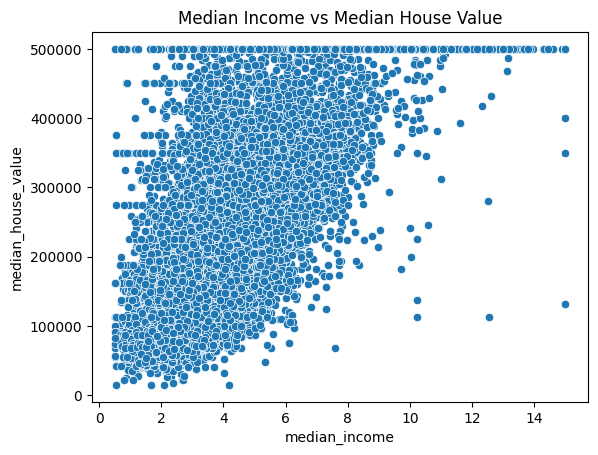

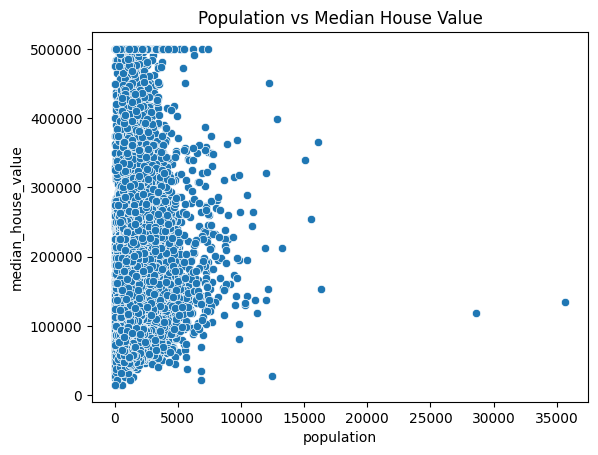

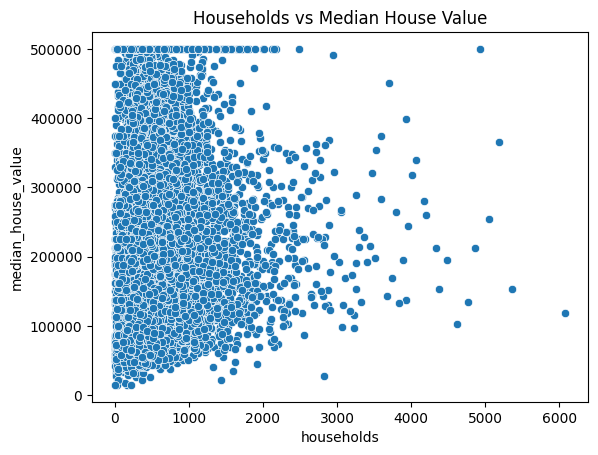

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot: Median Income vs Median House Value
sns.scatterplot(x=df["median_income"], y=df["median_house_value"])
plt.title("Median Income vs Median House Value")
plt.show()

# Scatterplot: Population vs Median House Value
sns.scatterplot(x=df["population"], y=df["median_house_value"])
plt.title("Population vs Median House Value")
plt.show()

# Scatterplot: Households vs Median House Value
sns.scatterplot(x=df["households"], y=df["median_house_value"])
plt.title("Households vs Median House Value")
plt.show()


### EDA Insights

- **Median Income**: Shows a strong linear relationship with `median_house_value`. As income rises, house values generally increase.
- **Population**: Appears to have no strong pattern with house value. Many areas have large populations but lower house prices.
- **Households**: Displays a weak positive correlation but not as strong as income.

The variable `median_income` is the most promising predictor based on visual analysis.


## Step 6: Univariate Linear Regression Models

We will build three separate linear regression models to predict `median_house_value` using:
- `median_income`
- `population`
- `households`

Each model will be evaluated using the slope, intercept, Mean Squared Error (MSE), and Mean Absolute Error (MAE).


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define function to run regression
def run_linear_regression(feature_name):
    X = df[[feature_name]]
    y = df["median_house_value"]

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    intercept = model.intercept_
    slope = model.coef_[0]
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    return intercept, slope, mse, mae, y_pred


In [8]:
results = {}

for feature in ["median_income", "population", "households"]:
    intercept, slope, mse, mae, y_pred = run_linear_regression(feature)
    results[feature] = {
        "Intercept": intercept,
        "Slope": slope,
        "MSE": mse,
        "MAE": mae,
        "Predictions": y_pred
    }

# Show summary table (rounded for readability)
pd.DataFrame({
    f: {
        "Intercept": round(v["Intercept"], 2),
        "Slope": round(v["Slope"], 2),
        "MSE": round(v["MSE"], 2),
        "MAE": round(v["MAE"], 2)
    }
    for f, v in results.items()
}).T


,Intercept,Slope,MSE,MAE
median_income,45085.58,41793.85,7.011312e+09,62625.93
population,210436.26,-2.51,1.330741e+10,91153.82
households,196928.58,19.87,1.325778e+10,90802.74


## Step 7: Visualize Regression Line on Scatter Plots

For each feature, we will overlay the predicted regression line on top of the actual scatter plot of data. This helps in visually assessing the model fit.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_regression_line(feature):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df["median_house_value"], alpha=0.4)
    plt.plot(df[feature], results[feature]["Predictions"], color='red', label='Regression Line')

    plt.title(f"{feature} vs Median House Value")
    plt.xlabel(feature)
    plt.ylabel("Median House Value")

    intercept = results[feature]["Intercept"]
    slope = results[feature]["Slope"]
    mse = results[feature]["MSE"]
    mae = results[feature]["MAE"]

    text = f"y = {intercept:.2f} + {slope:.2f}x\nMSE = {mse:.2f}\nMAE = {mae:.2f}"
    plt.text(0.05, 0.95, text, transform=plt.gca().transAxes,
             fontsize=10, bbox=dict(boxstyle="round", facecolor="white"))

    plt.legend()
    plt.show()


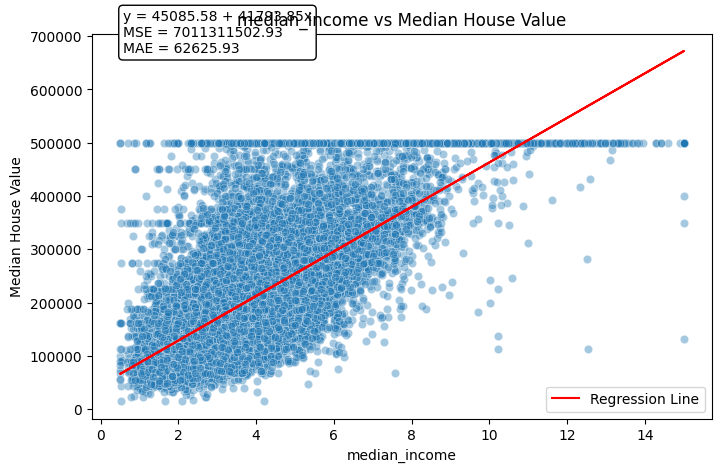

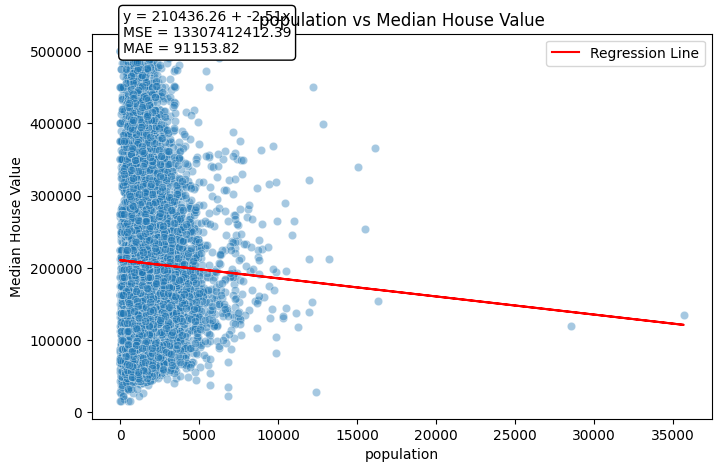

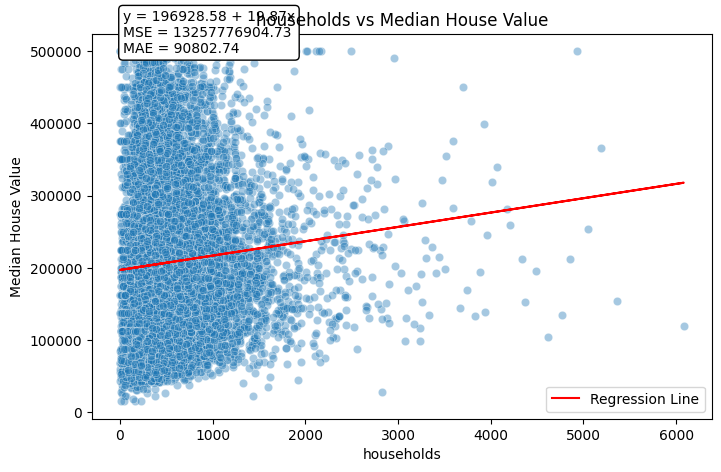

In [10]:
for feature in ["median_income", "population", "households"]:
    plot_regression_line(feature)


## Step 8: Final Summary and Recommendation

### Which Model Was Best?

- **`median_income`** performed best across all metrics:
  - Strongest linear pattern
  - Lowest MSE and MAE
- **`population`** had a scattered distribution with no useful predictive power.
- **`households`** performed slightly better than population but worse than income.

### Recommendation

Use **`median_income`** as the main predictor of house prices when building univariate models. It has the highest predictive value and is easy to interpret. The other features might help in multivariate models but offer little on their own.
